У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.listdir()
os.listdir('/Users/karinashport/Desktop/data/')
data_path = '/Users/karinashport/Desktop/data/yulu_rental.csv'
df = pd.read_csv(data_path)

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

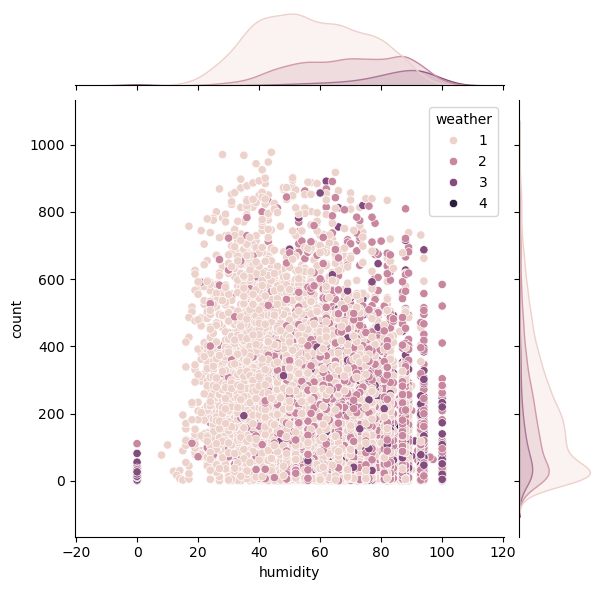

In [6]:
sns.jointplot(x='humidity', y='count', hue="weather", data=df);

Як і у минулому завданні, на графіку видно, що користувачі реєструються як при високих, так і при низьких рівнях вологості. Більшість реєстрацій в середньому діапазоні вологості (40-80%). 

Проте тепер помітно, що високрий рівень реєстрацій при ясній, мало хмарній, або частково хмарній погоді. Чим більша вологість, тим більше реєстрацій при туманній та хмарній погоді (2) та навіть трохи при легкому дощу (3). Це логічно, адже погода впливає на рівень вологості.

Можемо зробити висновок, що вологость не є єдиним визначальним фактором для реєстрацій користувачів. Треба розуміти, як погода впливає на вологість.

Бізнес має враховувати погодні умови та рівень вологості при плануванні розподілу велосипедів, адже при хорошій погоді попит значно вищий. В той самий час, бізнес може спрямувати маркетингові кампанії на підвищення популярності сервісу у період поганої погоди. Можливо, за рахунок надання знижок у цей період.

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

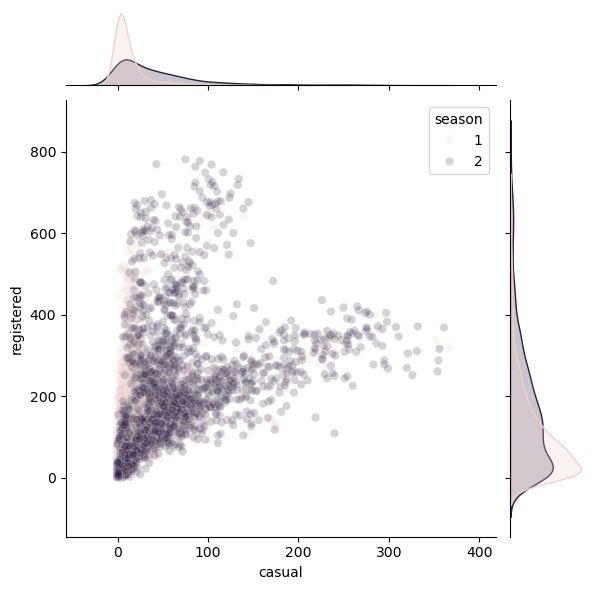

In [11]:
spring_and_summer = df[df['season'].isin([1, 2])]
sns.jointplot(x='casual', y='registered', hue='season', alpha=0.2, data=spring_and_summer);

Кількість зареєстрованих користувачів більше навесні, в той час як кількість неформальних користувачів збільшується влітку. Це може бути пов'язано з наявністю більшої кількості туристів або відпусток, що веде до збільшення активності користувачів.

Розуміння того, що літо є періодом високої активності для обох категорій користувачів, може допомогти у плануванні ресурсів, таких як кількість велосипедів, необхідних для забезпечення попиту, та їх maintenance.

Також можна підлаштовувати свої маркетингові кампанії, щоб спробувати вирівняти попит протягом року і приблизити весняні показники до літніх. Або щоб привернути увагу ще більшої кількості неформальних користувачів у літній період. 

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


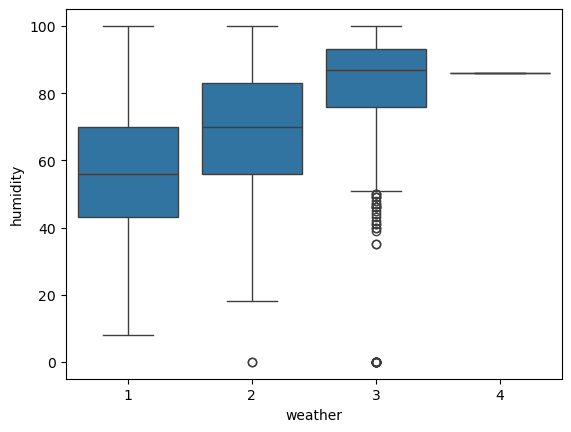

In [15]:
sns.boxplot(data=df, x='weather', y='humidity');

4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

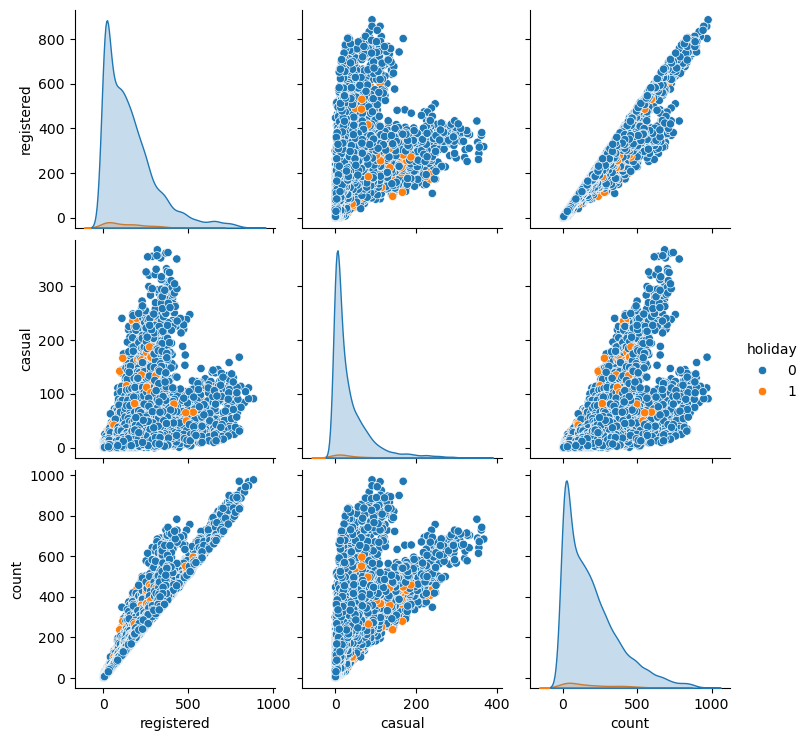

In [20]:
df_filtered = df[['registered', 'casual', 'count', 'holiday']]
sns.pairplot(data=df_filtered, hue="holiday")
plt.show();

У святкові дні та вихідні дні люди частіше відпочивають або проводять час на відкритому повітрі, що може сприяти збільшенню попиту на прокат велосипедів. Ми чітко бачимо, що кількість зареєстрованих користувачів, кількість неформальних користувачів та загальна кількість велосипедів, взятих в оренду, вища у святкові та вихідні. 

Знання про підвищену активність у святкові та вихідні може допомогти планувати маркетингові акції або знижки для залучення ще більшої кількості користувачів. Необхідно враховувати ці піки попиту для планування технічного обслуговування та логістики.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [24]:
df['datetime'] = pd.to_datetime(df['datetime'])

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [25]:
df['date'] = df.datetime.dt.date

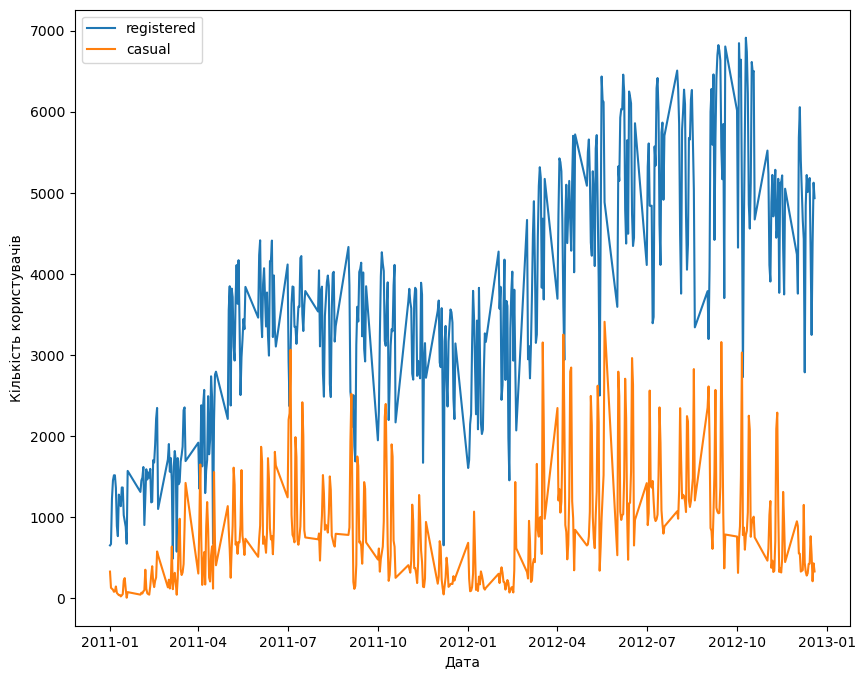

In [36]:
df_viz = df[['date', 'registered', 'casual']]
df_viz = df_viz.groupby('date').sum()
df_viz.plot(y=['registered', 'casual'], figsize=(10,8))
plt.xlabel('Дата')
plt.ylabel('Кількість користувачів')
plt.show();